<a href="https://colab.research.google.com/github/manu001223/IBM-Intership/blob/main/IBM_Intership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train_data = pd.read_csv("/content/train.csv")

train_data.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [ ]:
train_data.shape

(2018352, 9)

In [ ]:
train_data.dtypes

,0
county,int64
is_business,int64
product_type,int64
target,float64
is_consumption,int64
datetime,object
data_block_id,int64
row_id,int64
prediction_unit_id,int64


In [ ]:
train_data["datetime"] = pd.to_datetime(train_data["datetime"])
print(train_data["datetime"].min())
print(train_data["datetime"].max())

2021-09-01 00:00:00
2023-05-31 23:00:00


In [ ]:
train_data["target"].describe()

,target
count,2.017824e+06
mean,2.748556e+02
std,9.095024e+02
min,0.000000e+00
25%,3.780000e-01
50%,3.113300e+01
75%,1.802062e+02
max,1.548027e+04


In [ ]:
consumption_data = train_data[train_data["is_consumption"] == 1]
production_data = train_data[train_data["is_consumption"] == 0]

<Axes: xlabel='datetime'>

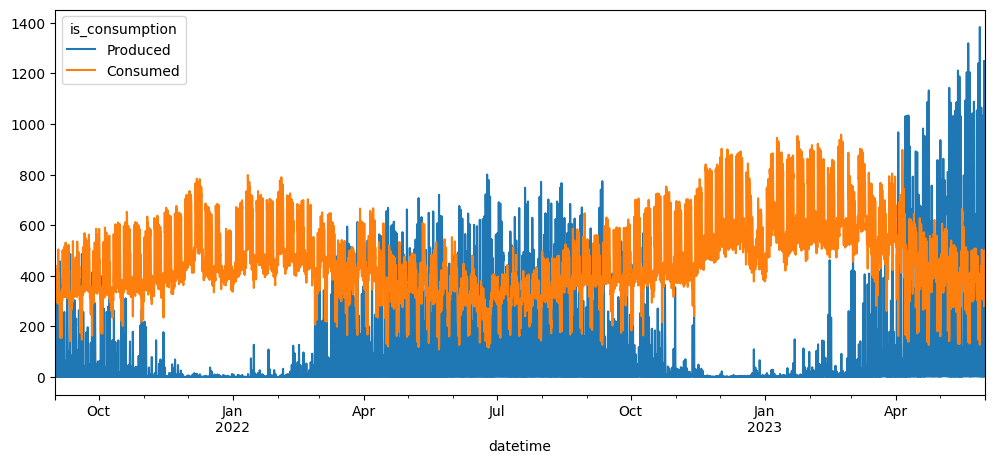

In [ ]:
#Average Energy Over Time (Consumption vs Production)
avg_energy = (
    train_data
    .groupby(["datetime", "is_consumption"])["target"]
    .mean()
    .unstack()
    .rename(columns={0: "Produced", 1: "Consumed"})
)
avg_energy.head()

#Daily Trend Visualization
avg_energy.plot(figsize=(12, 5))

/tmp/ipython-input-3669635378.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = avg_energy.resample("M").mean()


<Axes: xlabel='datetime'>

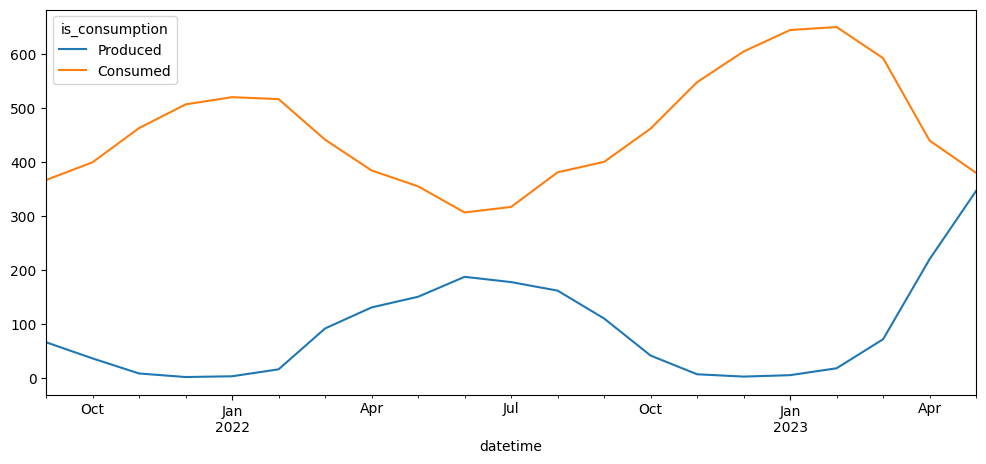

In [ ]:
#Monthly Energy Pattern (Seasonality)
monthly_avg = avg_energy.resample("M").mean()
monthly_avg.plot(figsize=(12, 5))

<Axes: xlabel='datetime'>

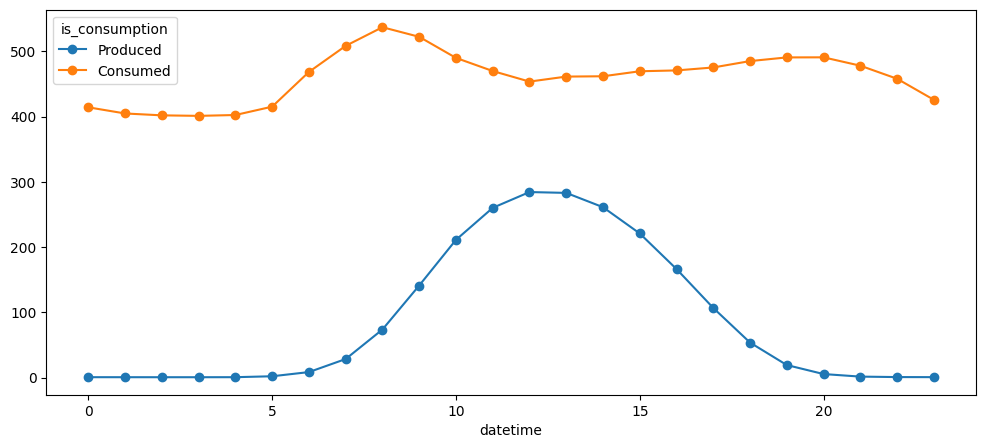

In [ ]:
#Hourly Energy Pattern (Daily Cycle)
hourly_avg = (
    train_data
    .groupby([train_data["datetime"].dt.hour, "is_consumption"])["target"]
    .mean()
    .unstack()
    .rename(columns={0: "Produced", 1: "Consumed"})
)

hourly_avg.plot(figsize=(12, 5), marker="o")


<Axes: xlabel='datetime'>

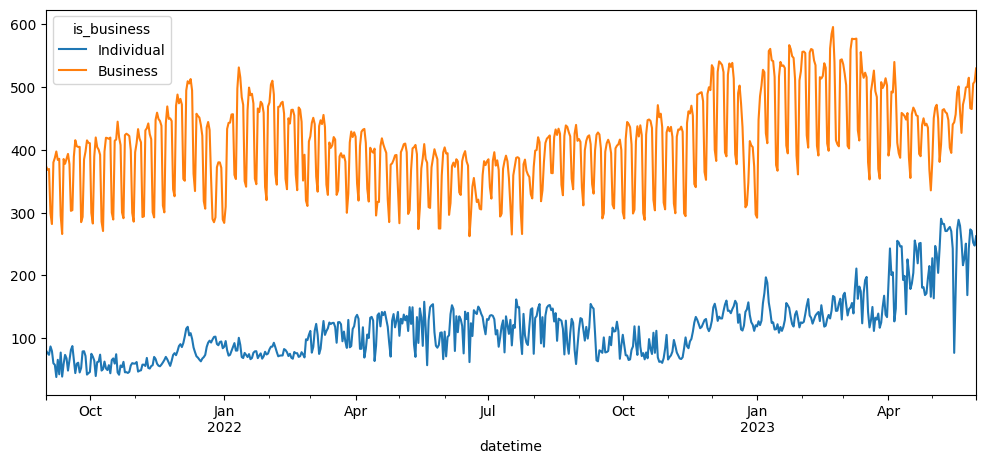

In [ ]:
#Business vs Individual Energy Behavior
business_avg = (
    train_data
    .groupby(["datetime", "is_business"])["target"]
    .mean()
    .unstack()
    .rename(columns={0: "Individual", 1: "Business"})
)

business_avg.resample("D").mean().plot(figsize=(12, 5))


In [ ]:
df = train_data[["datetime", "target", "is_consumption", "is_business"]].copy()
df.head()

,datetime,target,is_consumption,is_business
0,2021-09-01,0.713,0,0
1,2021-09-01,96.590,1,0
2,2021-09-01,0.000,0,0
3,2021-09-01,17.314,1,0
4,2021-09-01,2.904,0,0


In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [ ]:
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month

In [ ]:
df.isna().sum()

,0
datetime,0
target,528
is_consumption,0
is_business,0
hour,0
day,0
month,0


In [ ]:
# Remove rows with missing target values
df = df.dropna(subset=["target"])

# Optional: sample data for faster training
df_sample = df.sample(frac=0.1, random_state=42)

# Define features and target
features = ["hour", "day", "month", "is_consumption", "is_business"]
X = df_sample[features]
y = df_sample["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 359.33824762234804


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
print("Random Forest MAE:", rf_mae)


Random Forest MAE: 326.7702246177675
